# Первая часть проекта. Эксперименты

## 1. Исследуем, как зависят характеристики графов от случайных величин

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
from dataclasses import dataclass
from tqdm import tqdm
from itertools import product
from characteristics_experimental import *
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '../common_tools')))
from graphs import KNN_Graph, Distance_Graph

In [2]:
n = 100
k = 3
d = 0.15

In [3]:
m = 350

lambdas = np.linspace(0.1, 25.0, m)
alphas = np.linspace(0.1, 25.0, m)

results = pd.DataFrame(columns=["parameter_type", "parameter_value", "graph_type", "characteristic_type", "characteristic_value"])

In [5]:
for lambda_param in tqdm(lambdas):
    average_characteristics = get_average_characteristics(lambda_param, 1, n, k, d)

    results.loc[len(results)] = ["exp", lambda_param, "knn", "components", average_characteristics.knn_exp_components]

    results.loc[len(results)] = ["exp", lambda_param, "knn", "chromatic", average_characteristics.knn_exp_chromatic]

    results.loc[len(results)] = ["exp", lambda_param, "dist", "components", average_characteristics.distance_exp_components]

    results.loc[len(results)] = ["exp", lambda_param, "dist", "chromatic", average_characteristics.distance_exp_chromatic]

for alpha_param in tqdm(alphas):
    average_characteristics = get_average_characteristics(1, alpha_param, n, k, d)

    results.loc[len(results)] = ["pareto", alpha_param, "knn", "components", average_characteristics.knn_pareto_components]

    results.loc[len(results)] = ["pareto", alpha_param, "knn", "chromatic", average_characteristics.knn_pareto_chromatic]

    results.loc[len(results)] = ["pareto", alpha_param, "dist", "components", average_characteristics.distance_pareto_components]

    results.loc[len(results)] = ["pareto", alpha_param, "dist", "chromatic", average_characteristics.distance_pareto_chromatic]


100%|██████████| 350/350 [01:31<00:00,  3.81it/s]


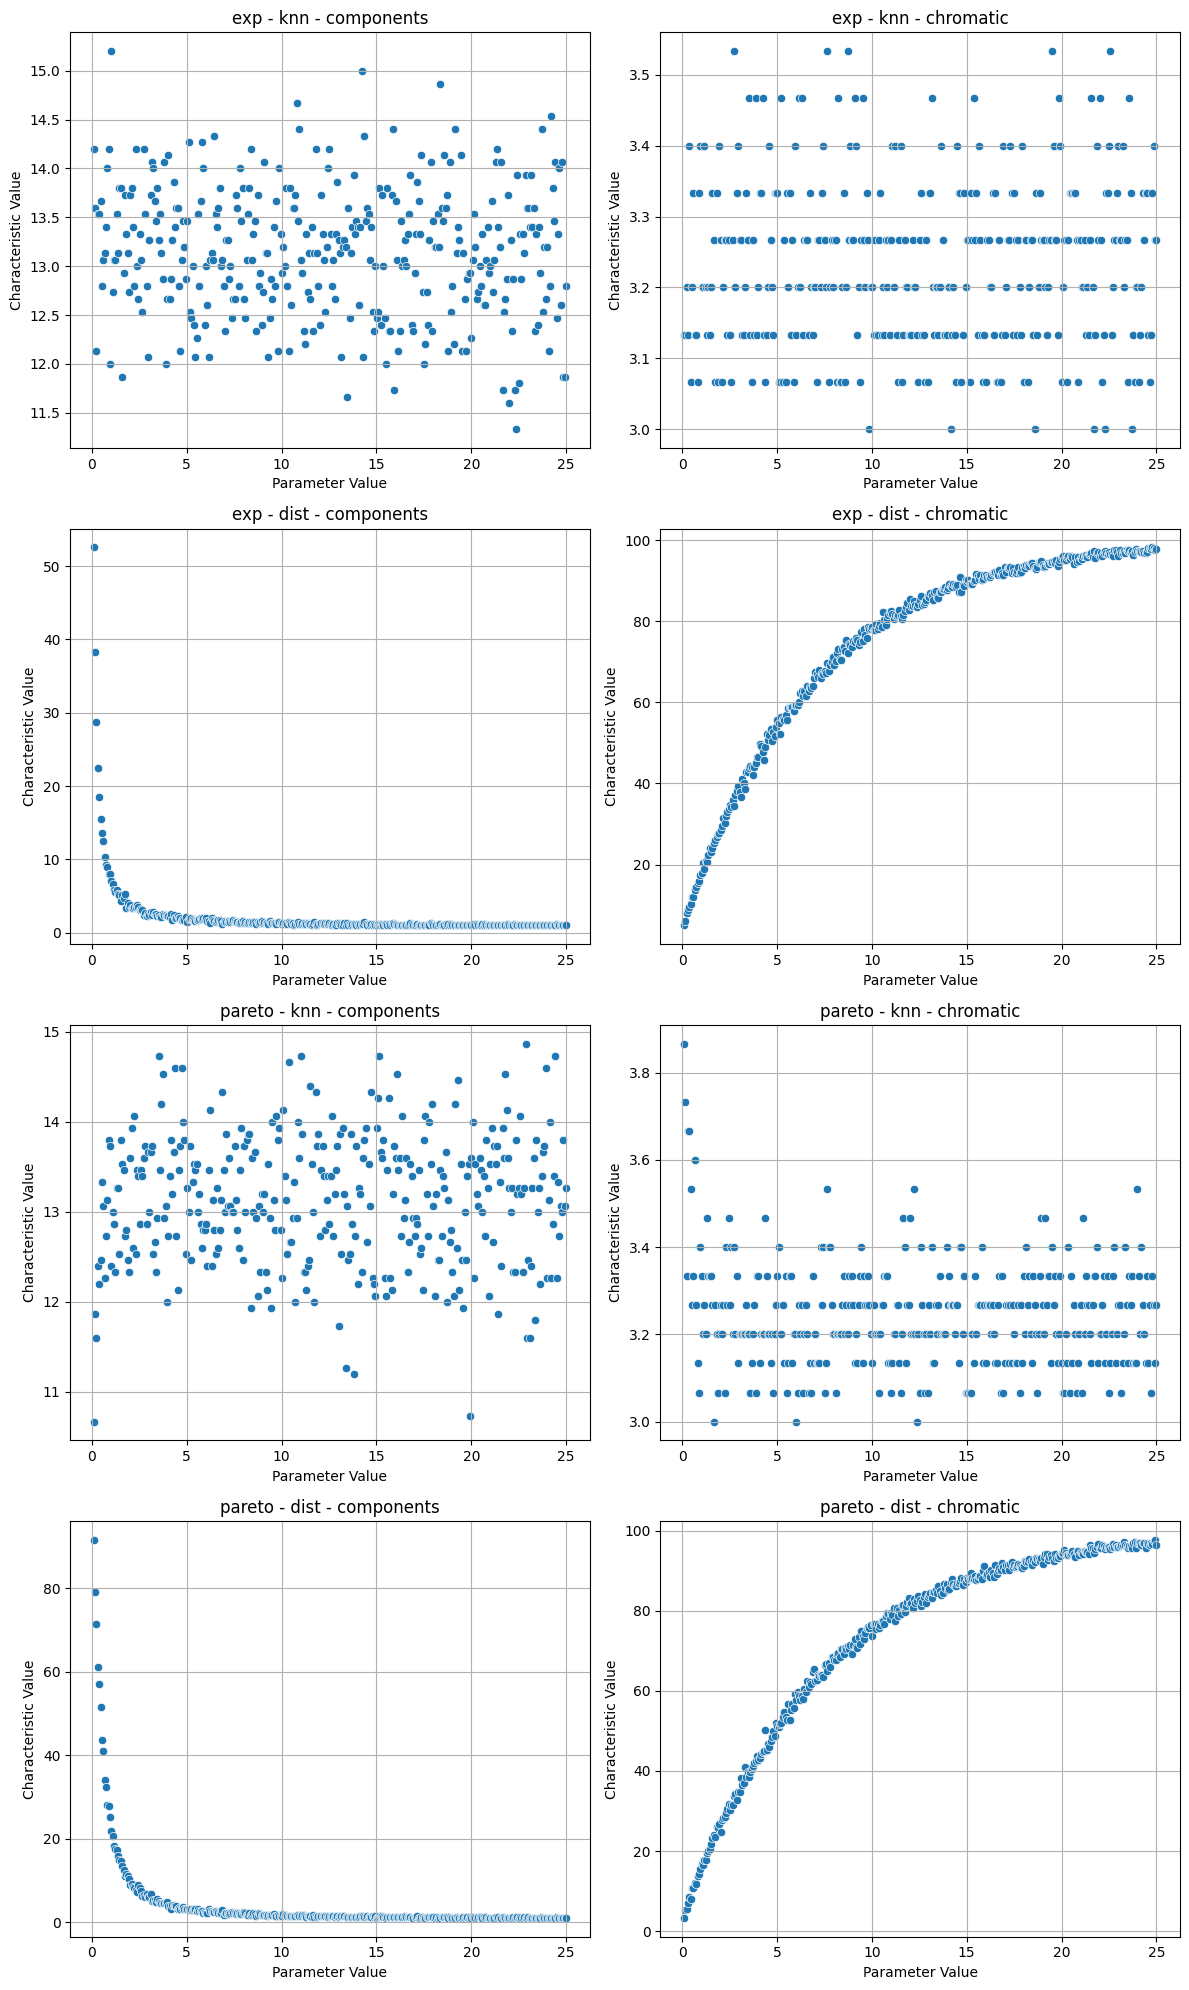

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_combinations = results[['parameter_type', 'graph_type', 'characteristic_type']].drop_duplicates()

num_plots = len(unique_combinations)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))
axes = axes.flatten()

for ax, (_, row) in zip(axes, unique_combinations.iterrows()):
    param_type = row['parameter_type']
    graph_type = row['graph_type']
    char_type = row['characteristic_type']

    filtered_data = results[
        (results['parameter_type'] == param_type) &
        (results['graph_type'] == graph_type) &
        (results['characteristic_type'] == char_type)
    ]

    sns.scatterplot(data=filtered_data, x='parameter_value', y='characteristic_value', ax=ax, marker='o')

    ax.set_title(f'{param_type} - {graph_type} - {char_type}')
    ax.set_xlabel('Parameter Value')
    ax.set_ylabel('Characteristic Value')
    ax.grid()

for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Видно, что в дистанционном графе наблюдается сильная взаимосвязь между параметрами распределения и характеристикой графа. В KNN графе наоброт --- никакой взаимосвязи нет.